Homework 2

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics

In [10]:
aapl = pd.read_csv('AAPL.csv')

In [13]:
aapl.head()

Date        Open        High         Low       Close   Adj Close  \
0  2018-09-17  222.149994  222.949997  217.270004  217.880005  214.550659   
1  2018-09-18  217.789993  221.850006  217.119995  218.240005  214.905167   
2  2018-09-19  218.500000  219.619995  215.300003  218.369995  215.033142   
3  2018-09-20  220.240005  222.279999  219.149994  220.029999  216.667816   
4  2018-09-21  220.779999  221.360001  217.289993  217.660004  214.334030   

     Volume  
0  37195100  
1  31571700  
2  27123800  
3  26608800  
4  96246700

In [12]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Date         250 non-null object
Open         250 non-null float64
High         250 non-null float64
Low          250 non-null float64
Close        250 non-null float64
Adj Close    250 non-null float64
Volume       250 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [5]:
aapl.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   192.005960  194.051640  190.013320  192.048080  190.506955   
std     20.948312   21.089815   20.850386   20.916556   20.816736   
min    143.979996  145.720001  142.000000  142.190002  140.505798   
25%    174.737499  175.902496  173.362499  174.757499  173.279304   
50%    196.364998  198.750000  193.805000  196.345001  195.165612   
75%    207.449997  209.089996  205.104996  207.479996  206.476417   
max    230.779999  233.470001  229.779999  232.070007  228.523819   

             Volume  
count  2.500000e+02  
mean   3.249190e+07  
std    1.391808e+07  
min    1.136200e+07  
25%    2.289640e+07  
50%    2.904540e+07  
75%    3.876678e+07  
max    9.624670e+07

In [7]:
aapl.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

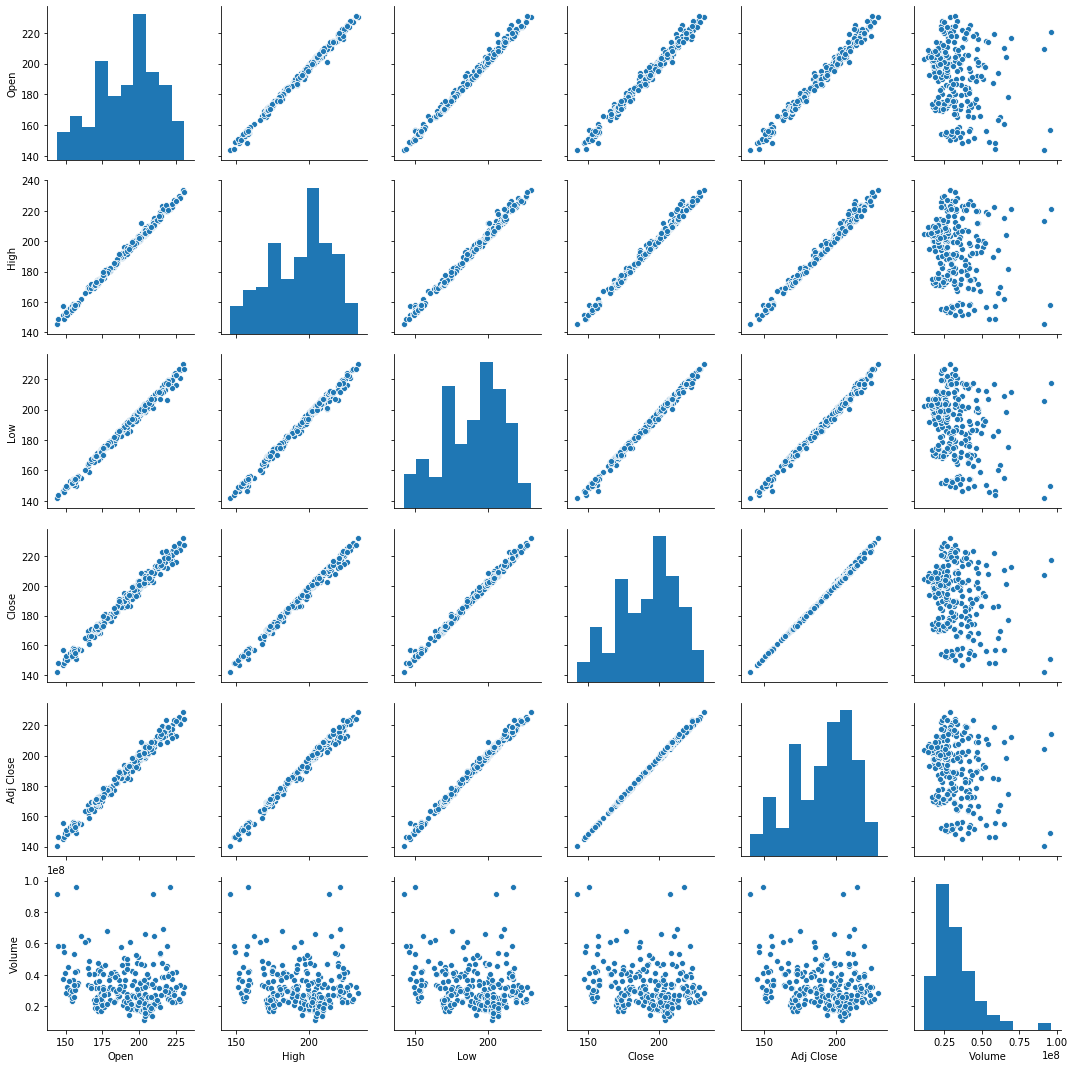

In [8]:
sns.pairplot(aapl)

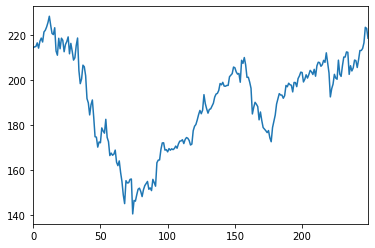

In [14]:
aapl["Adj Close"].plot()

In [16]:
aapl.set_index("Date", inplace=True)

In [18]:
window_size=32
num_samples=len(aapl)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = aapl['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [19]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [20]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [22]:
y_test.shape

(44,)

In [23]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

In [24]:
y_pred_lag=np.roll(y_test,1)

In [25]:
get_performance(y_pred_lag)

Mean Absolute Error: 3.2488
Mean Squared Error: 19.5791
Root Mean Squared Error: 4.4248


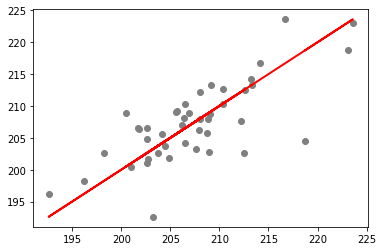

In [26]:
get_plot(y_pred_lag)


Linear Regression

In [41]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred_lr=model_lr.predict(x_test)

In [29]:
get_performance(y_pred_lr)

Mean Absolute Error: 3.3142
Mean Squared Error: 18.6691
Root Mean Squared Error: 4.3208


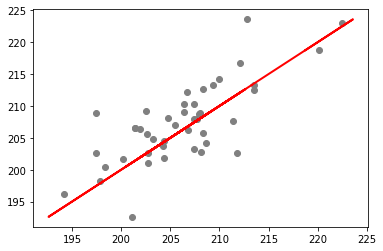

In [31]:
get_plot(y_pred_lr)

In [32]:
get_performance(y_pred_lr)

Mean Absolute Error: 3.3142
Mean Squared Error: 18.6691
Root Mean Squared Error: 4.3208


Ridge Regression

In [33]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [34]:
get_performance(y_pred_ridge)

Mean Absolute Error: 3.314
Mean Squared Error: 18.6666
Root Mean Squared Error: 4.3205


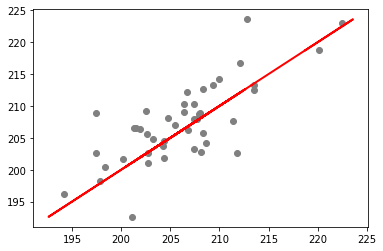

In [35]:
get_plot(y_pred_ridge)


Gradient Boosting Trees

In [36]:
# Model - Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# Infer
y_pred_gb = model_gb.predict(x_test)

In [37]:
get_performance(y_pred_gb)

Mean Absolute Error: 5.5251
Mean Squared Error: 50.7969
Root Mean Squared Error: 7.1272


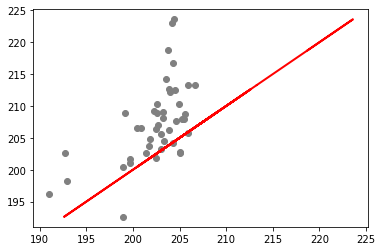

In [38]:
get_plot(y_pred_gb)

Comaprison

In [39]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "gb":np.absolute(y_test-y_pred_gb)})

(9, 20)

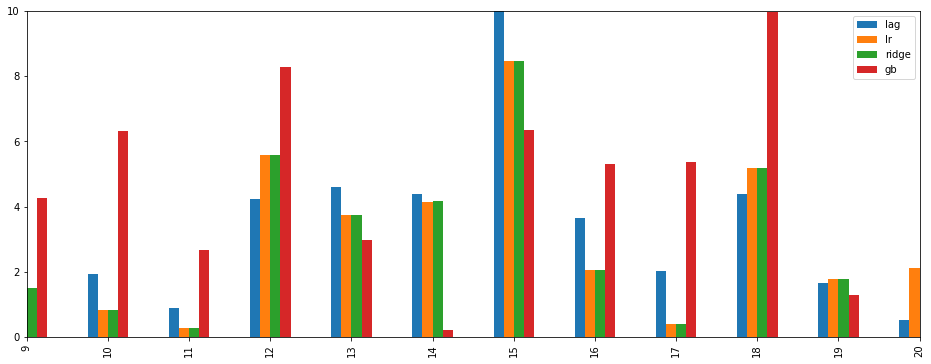

In [40]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(9,20)

Thus, we conclude that the prediction for Linear Regression is the best performing one